In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('out.csv')

In [3]:
df.drop(columns=['Soundcloud Streams','TIDAL Popularity', 'Artist Genre'], axis=1,inplace=True)

In [4]:
df.dropna(subset=['Artist'], inplace=True)

In [5]:
def remove(x):
    return x.replace(',', '')

In [6]:
df["All Time Rank"]=df["All Time Rank"].apply(remove)
df['All Time Rank'] = pd.to_numeric(df["All Time Rank"])
df["Release Date"]=pd.to_datetime(df["Release Date"])
df = df.map(lambda x: x.replace(',','') if isinstance(x,str) else x)

In [7]:
for x in df.columns[6:]:
    df[x] = pd.to_numeric(df[x],downcast="integer")

In [8]:
df["Spotify Streams"].fillna(df["Spotify Streams"].median(),inplace=True)

C:\Users\boz42\AppData\Local\Temp\ipykernel_17792\840792646.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Spotify Streams"].fillna(df["Spotify Streams"].median(),inplace=True)


In [9]:
for i in df.columns[7:27]:
    df[i].fillna(df[i].median(),inplace=True)

C:\Users\boz42\AppData\Local\Temp\ipykernel_17792\2211514925.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].median(),inplace=True)
C:\Users\boz42\AppData\Local\Temp\ipykernel_17792\2211514925.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

Linear Regression Mean Squared Error: 157.6342724427324
R2 Score: 0.25636614894472465


[Text(0.5, 0, 'Actual Spotify Popularity'),
 Text(0, 0.5, 'Predicted Spotify Popularity')]

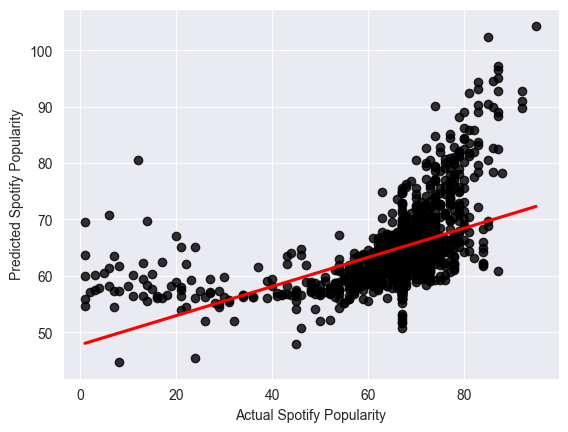

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import *
from sklearn.ensemble import *

features = ['Spotify Streams', 'All Time Rank','YouTube Views','Pandora Streams', 'TikTok Likes', 'TikTok Posts','Apple Music Playlist Count', 'Spotify Playlist Count', 'Spotify Playlist Reach','Amazon Playlist Count']
target = 'Spotify Popularity'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)



y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Linear Regression Mean Squared Error: {mse}')

print(f'R2 Score: {r2_score(y_test, y_pred)}')
ax = sns.regplot(x=y_test, y=y_pred, ci=None, color='black', scatter_kws={'color': 'black'}, line_kws={'color': 'red'})
ax.set(xlabel='Actual Spotify Popularity', ylabel='Predicted Spotify Popularity')
# plt.scatter(X_test, y_test, color='black')
# plt.plot(X_test, y_pred, color='blue', linewidth=3)
# 
# plt.xticks(())
# plt.yticks(())

152.0397927329838
R2 Score: 0.2906542866780987


[Text(0.5, 0, 'Actual Spotify Popularity'),
 Text(0, 0.5, 'Predicted Spotify Popularity')]

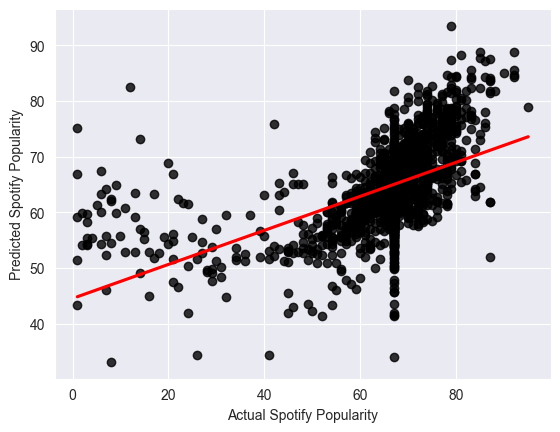

In [11]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

poly_X_train, poly_X_test, poly_y_train, poly_y_test = train_test_split(X_poly, y, test_size = 0.3, random_state=1)

reg = LinearRegression()

model2 = reg.fit(poly_X_train, poly_y_train)
y_pred = model2.predict(poly_X_test)
print(mean_squared_error(y_pred, poly_y_test))
print(f'R2 Score: {r2_score(poly_y_test, y_pred)}')

ax = sns.regplot(x=poly_y_test, y=y_pred, ci=None, color='black', scatter_kws={'color': 'black'}, line_kws={'color': 'red'})
ax.set(xlabel='Actual Spotify Popularity', ylabel='Predicted Spotify Popularity')


Random Forest Mean Squared Error: 133.02040052219323
R2 Score: 0.3724811795279469


[Text(0.5, 0, 'Actual Spotify Popularity'),
 Text(0, 0.5, 'Predicted Spotify Popularity')]

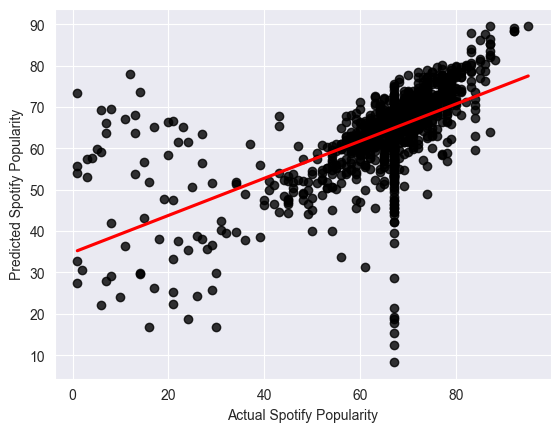

In [12]:
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Random Forest Mean Squared Error: {mse}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')

ax = sns.regplot(x=y_test, y=y_pred, ci=None, color='black', scatter_kws={'color': 'black'}, line_kws={'color': 'red'})
ax.set(xlabel='Actual Spotify Popularity', ylabel='Predicted Spotify Popularity')

In [13]:
from xgboost import XGBRegressor

XGBoost Mean Squared Error: 148.1805157627329
R2 Score: 0.30096389649002175


[Text(0.5, 0, 'Actual Spotify Popularity'),
 Text(0, 0.5, 'Predicted Spotify Popularity')]

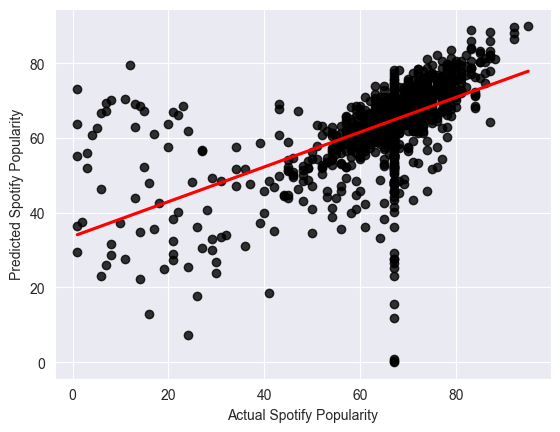

In [14]:
model = XGBRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'XGBoost Mean Squared Error: {mse}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')

ax = sns.regplot(x=y_test, y=y_pred, ci=None, color='black', scatter_kws={'color': 'black'}, line_kws={'color': 'red'})
ax.set(xlabel='Actual Spotify Popularity', ylabel='Predicted Spotify Popularity')

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 27504066.0000 - val_loss: 9690198.0000
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5718319.5000 - val_loss: 3084641.5000
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2887137.5000 - val_loss: 1629474.3750
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1406328.5000 - val_loss: 610254.5625
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 587875.9375 - val_loss: 657595.3125
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 622877.8125 - val_loss: 423513.7500
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 607097.0000 - val_loss: 239751.5156
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 262073.0625 - val_loss: 225688.0781
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 243947.8594 - val_loss: 499334.4062
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 417345.3750 - val_loss: 183124.7969
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s

<Axes: >

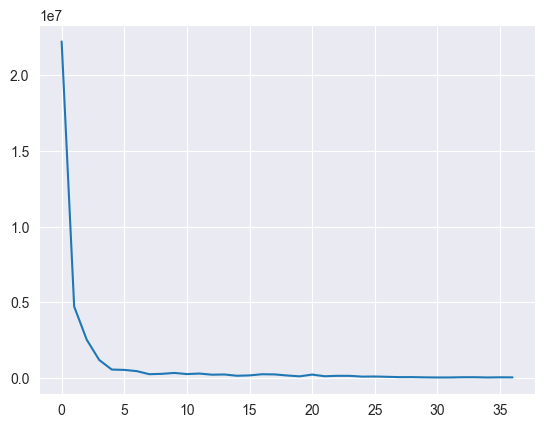

In [18]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

model.compile(
    optimizer='adam',
    loss='mae'
)

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=5, # how many epochs to wait before stopping
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=50,
    callbacks=[early_stopping]
)

model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'NN Mean Squared Error: {mse}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')

history_df = pd.DataFrame(history.history)
history_df['loss'].plot()